In [7]:
from desc.grid import Grid, LinearGrid
from desc.backend import jnp
import matplotlib.pyplot as plt
import desc.equilibrium
from desc.equilibrium import Equilibrium
from desc.plotting import plot_3d
import numpy as np
import plotly.graph_objects as go

In [18]:
# Function to upload the data - the files have four columns, which go to for jnp.arrays
def upload_data(filename):
    data = np.loadtxt(filename)
    return data
data1 = upload_data("sol1.txt")
data2 = upload_data("sol2.txt")
data3 = upload_data("sol3.txt")
data4 = upload_data("sol4.txt")
data5 = upload_data("sol5.txt")
data6 = upload_data("sol6.txt")
data7 = upload_data("sol7.txt")
data8 = upload_data("sol8.txt")

def Trajectory_Plot(solution):
    fig, ax = plt.subplots()
    ax.plot(jnp.sqrt(solution[:, 0]) * jnp.cos(solution[:, 1]), jnp.sqrt(solution[:, 0]) * jnp.sin(solution[:, 1]))
    ax.set_aspect("equal", adjustable='box')
    plt.xlabel(r'$\sqrt{\psi}cos(\theta)$')
    plt.ylabel(r'$\sqrt{\psi}sin(\theta)$')
    plt.show()

def Quantity_Plot(tmax, solution):
    time = jnp.liunspace(0, tmax, len(solution[:, 0]))
    fig, axs = plt.subplots(2, 2)
    axs[0, 1].plot(time, solution[:, 0], 'tab:orange')
    axs[0, 1].set_title(r'$\psi$ (t)')
    axs[1, 0].plot(time, solution[:, 1], 'tab:green')
    axs[1, 0].set_title(r'$\theta$ (t)')
    axs[1, 1].plot(time, solution[:, 2], 'tab:red')
    axs[1, 1].set_title(r'$\zeta$ (t)')
    axs[0, 0].plot(time, solution[:, 3], 'tab:blue')
    axs[0, 0].set_title(r"$v_{\parallel}$ (t)")
    fig = plt.gcf()
    fig.set_size_inches(10.5, 10.5)
    plt.show()

In [19]:
eq = desc.io.load("eq_2411_M1_N1.h5")
eq._iota = eq.get_profile("iota").to_powerseries(order=eq.L, sym=True)
eq._current = None

/Users/joaobiu/Developer/DESC/desc/io/hdf5_io.py:127: RuntimeWarning:


The object attribute '_rho' was not loaded from the file.
This is likely because the file containing 'FourierRZToroidalSurface' was created before '_rho' became an attribute of objects of class '<class 'desc.geometry.surface.FourierRZToroidalSurface'>'.
The user may verify that a default value has been set.
This warning will persist until the file is saved with the new object.

Note to developers: Add 'def _set_up(self)' as a method to class '<class 'desc.geometry.surface.FourierRZToroidalSurface'>'
(or the superclass where this new attribute is assigned) that assigns a value to '_rho'.
This method is called automatically when a file is loaded.
Recall that the testing suite will fail on warnings.

/Users/joaobiu/Developer/DESC/desc/io/hdf5_io.py:127: RuntimeWarning:


The object attribute '_shift' was not loaded from the file.
This is likely because the file containing 'FourierRZCurve' was created before '_shift' b

In [21]:
grid1 = Grid(np.vstack((np.sqrt(data1[:, 0]), data1[:, 1], data1[:, 2])).T,sort=False)
grid2 = Grid(np.vstack((np.sqrt(data2[:, 0]), data2[:, 1], data2[:, 2])).T,sort=False)
grid3 = Grid(np.vstack((np.sqrt(data3[:, 0]), data3[:, 1], data3[:, 2])).T,sort=False)
grid4 = Grid(np.vstack((np.sqrt(data4[:, 0]), data4[:, 1], data4[:, 2])).T,sort=False)
grid5 = Grid(np.vstack((np.sqrt(data5[:, 0]), data5[:, 1], data5[:, 2])).T,sort=False)
grid6 = Grid(np.vstack((np.sqrt(data6[:, 0]), data6[:, 1], data6[:, 2])).T,sort=False)
grid7 = Grid(np.vstack((np.sqrt(data7[:, 0]), data7[:, 1], data7[:, 2])).T,sort=False)
grid8 = Grid(np.vstack((np.sqrt(data8[:, 0]), data8[:, 1], data8[:, 2])).T,sort=False)

data_desc1 = eq.compute(["X", "Y", "Z"], grid1)
data_desc2 = eq.compute(["X", "Y", "Z"], grid2)
data_desc3 = eq.compute(["X", "Y", "Z"], grid3)
data_desc4 = eq.compute(["X", "Y", "Z"], grid4)
data_desc5 = eq.compute(["X", "Y", "Z"], grid5)
data_desc6 = eq.compute(["X", "Y", "Z"], grid6)
data_desc7 = eq.compute(["X", "Y", "Z"], grid7)
data_desc8 = eq.compute(["X", "Y", "Z"], grid8)

<Figure size 431.653x287.769 with 0 Axes>

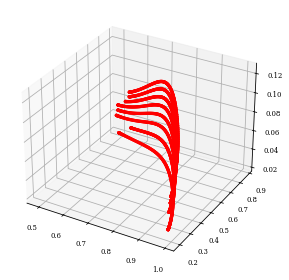

In [22]:
def plot_trajectory(ax=None, **kwargs):
    if ax is None:
        fig = plt.figure()
        ax = plt.figure().add_subplot(projection='3d')
    ax.scatter(data_desc1["X"], data_desc1["Y"], data_desc1["Z"], **kwargs)
    ax.scatter(data_desc2["X"], data_desc2["Y"], data_desc2["Z"], **kwargs)
    ax.scatter(data_desc3["X"], data_desc3["Y"], data_desc3["Z"], **kwargs)
    ax.scatter(data_desc4["X"], data_desc4["Y"], data_desc4["Z"], **kwargs)
    ax.scatter(data_desc5["X"], data_desc5["Y"], data_desc5["Z"], **kwargs)
    ax.scatter(data_desc6["X"], data_desc6["Y"], data_desc6["Z"], **kwargs)
    ax.scatter(data_desc7["X"], data_desc7["Y"], data_desc7["Z"], **kwargs)
    ax.scatter(data_desc8["X"], data_desc8["Y"], data_desc8["Z"], **kwargs)
    return ax

ax = plot_trajectory(color="r", marker=".")
# ax = plot_trajectory(data2, ax=ax, color="b", marker=".")

In [23]:
grid = LinearGrid(rho=np.sqrt(0.8), M = 100, N = 100)
fig = plot_3d(eq, "B", alpha=0.3, grid=grid)
fig.add_trace(go.Scatter3d(x=data_desc1["X"], y=data_desc1["Y"], z=data_desc1["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc2["X"], y=data_desc2["Y"], z=data_desc2["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc3["X"], y=data_desc3["Y"], z=data_desc3["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc4["X"], y=data_desc4["Y"], z=data_desc4["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc5["X"], y=data_desc5["Y"], z=data_desc5["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc6["X"], y=data_desc6["Y"], z=data_desc6["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc7["X"], y=data_desc7["Y"], z=data_desc7["Z"], mode='markers', marker_size=2))
fig.add_trace(go.Scatter3d(x=data_desc8["X"], y=data_desc8["Y"], z=data_desc8["Z"], mode='markers', marker_size=2))
# fig.write_image("surface_and_tracing.png")